<a href="https://colab.research.google.com/github/CharryDavid/Computer-Vision-Class-/blob/main/Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
print("hello")

hello


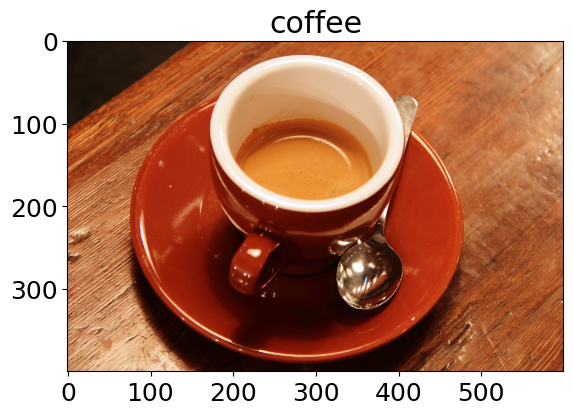

In [4]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from skimage import data

matplotlib.rcParams['font.size'] = 18

images = ('coffee',)


for name in images:
    caller = getattr(data, name)
    image = caller()
    plt.figure()
    plt.title(name)
    if image.ndim == 2:
        plt.imshow(image, cmap=plt.cm.gray)
    else:
        plt.imshow(image)

plt.show()

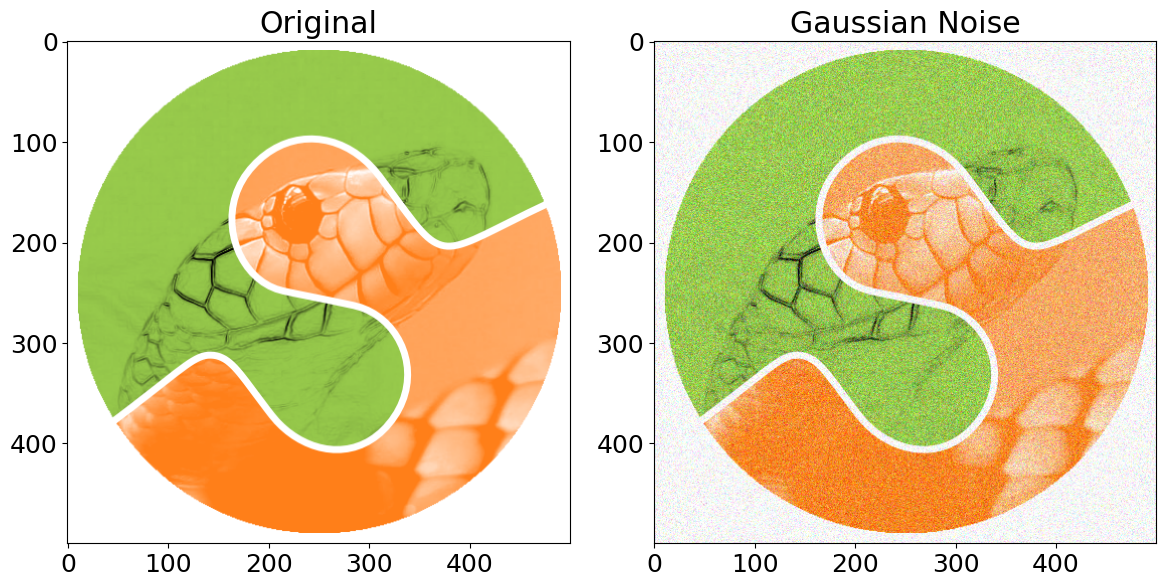

In [22]:
import matplotlib.pyplot as plt
import matplotlib
from skimage import data
from skimage.util import random_noise as skimage_random_noise  # Alias to avoid conflict

matplotlib.rcParams['font.size'] = 18

# Custom function without recursion issue
def add_random_noise(image, mode='gaussian', clip=True, **kwargs):
    return skimage_random_noise(image, mode=mode, clip=clip, **kwargs)

image = data.logo()
noisy_image = add_random_noise(image, mode='gaussian', var=0.01)  # Add Gaussian noise

plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image)

# Noisy image
plt.subplot(1, 2, 2)
plt.title("Gaussian Noise")
plt.imshow(noisy_image)

plt.tight_layout()
plt.show()




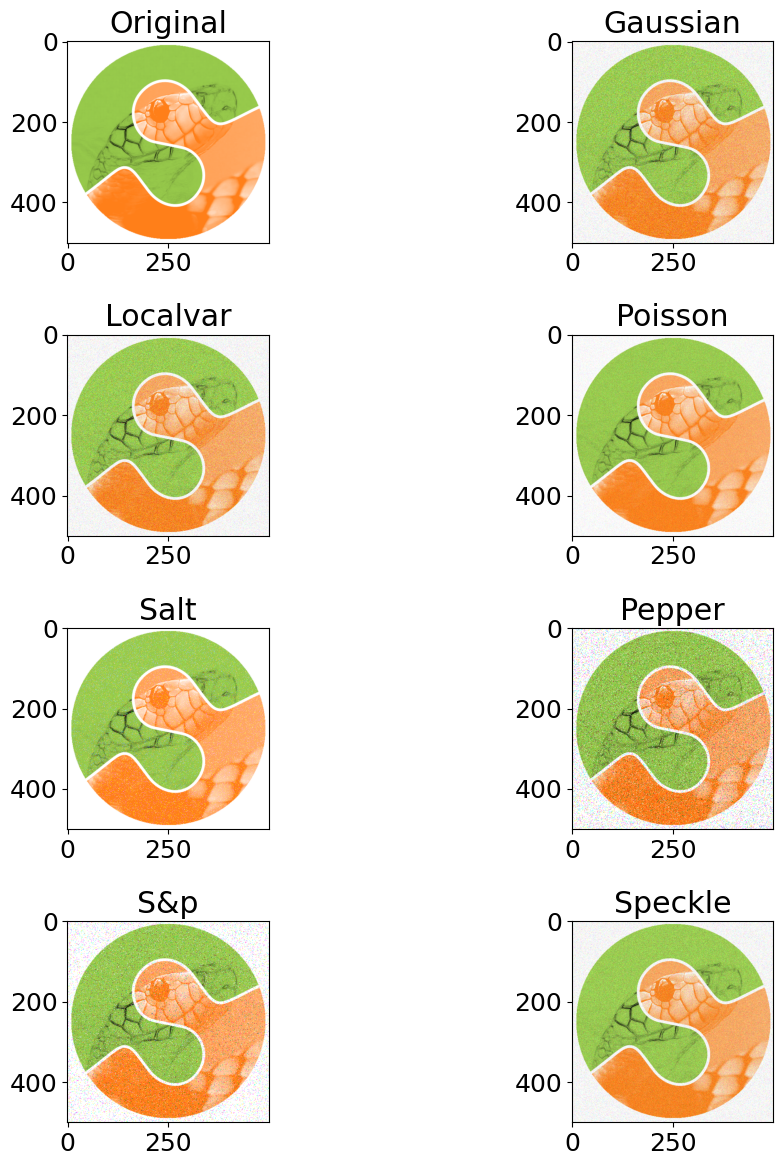

In [39]:
import matplotlib.pyplot as plt
import matplotlib
from skimage import data
from skimage.util import random_noise as skimage_random_noise  # Alias to avoid conflict
import numpy as np

matplotlib.rcParams['font.size'] = 18


def add_random_noise(image, mode='gaussian', clip=True, **kwargs):
    return skimage_random_noise(image, mode=mode, clip=clip, **kwargs)

image = data.logo()

# Noise types to apply
noise_types = ['gaussian', 'localvar', 'poisson', 'salt', 'pepper', 's&p', 'speckle']

# Create a 4x2 grid for displaying images (2 columns, 4 rows)
plt.figure(figsize=(12, 12))

# Loop through the noise types and display the noisy images
for i, noise_type in enumerate(noise_types, 1):
    if noise_type == 'gaussian' or noise_type == 'speckle':  # 'gaussian' and 'speckle' require var
        noisy_image = add_random_noise(image, mode=noise_type, var=0.01)
    elif noise_type == 'localvar':  # 'localvar' requires a local variance map
        local_vars = 0.01 * np.ones_like(image)  # Create a 2D array of the same size as the image
        noisy_image = add_random_noise(image, mode=noise_type, local_vars=local_vars)
    else:  # 'poisson', 'salt', 'pepper', 's&p' don't require var or local_vars
        noisy_image = add_random_noise(image, mode=noise_type)

    # Display the noisy image (using the correct subplot index)
    plt.subplot(4, 2, i + 1)  # Positioning in the grid (4 rows, 2 columns)
    plt.title(noise_type.capitalize())
    plt.imshow(noisy_image)
    plt.grid(False)
    plt.axis('on')

# Display the original image in the top left (first position)
plt.subplot(4, 2, 1)
plt.title("Original")
plt.imshow(image)
plt.grid(False)
plt.axis('on')


plt.tight_layout()
plt.show()
